# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_api_key = '6b0bad7c1503269f2aa5ba0cadc0d7a5'
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Running on ONE SINGLE CITY to make sure everything is working properly

city_data = []

city = cities[1]

city_url = url + "&q=" + city.replace(" ","+")

# Run an API request for one city
city_weather = requests.get(city_url).json()
# Parse out the max temp, humidity, and cloudiness
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_weather_description = city_weather["weather"][0]["description"]

# Append the City information into city_data list
city_data.append({"City": city.title(), 
                    "Lat": city_lat, 
                    "Lng": city_lng, 
                    "Max Temp": city_max_temp,
                    "Current Description": city_weather_description,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country})

print(len(city_data))

1


In [6]:
city_weather

{'coord': {'lon': 115.33, 'lat': -33.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 58.93,
  'feels_like': 57.87,
  'temp_min': 57,
  'temp_max': 60.01,
  'pressure': 1012,
  'humidity': 72},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 62, 'gust': 5.99},
 'clouds': {'all': 100},
 'dt': 1609189168,
 'sys': {'type': 3,
  'id': 2020551,
  'country': 'AU',
  'sunrise': 1609189780,
  'sunset': 1609241491},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [7]:
print(city_weather["weather"])
print(type(city_weather["weather"]))
print('\n')

print(city_weather["main"])
print(type(city_weather["main"]))
print('\n')

print(city_weather["coord"])
print(type(city_weather["coord"]))
print('\n')

print(city_weather["clouds"])
print(type(city_weather["clouds"]))
print('\n')

print(city_weather["sys"])
print(type(city_weather["sys"]))

[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}]
<class 'list'>


{'temp': 58.93, 'feels_like': 57.87, 'temp_min': 57, 'temp_max': 60.01, 'pressure': 1012, 'humidity': 72}
<class 'dict'>


{'lon': 115.33, 'lat': -33.65}
<class 'dict'>


{'all': 100}
<class 'dict'>


{'type': 3, 'id': 2020551, 'country': 'AU', 'sunrise': 1609189780, 'sunset': 1609241491}
<class 'dict'>


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_api_response = city_weather
city_lat = weather_api_response["coord"]["lat"]
city_lng = weather_api_response["coord"]["lon"]

coordinate_pair = (city_lat, city_lng)
print(coordinate_pair)

(-33.65, 115.33)


In [10]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        # Due to API call limit, sleep for 60 seconds after every 50 cities
        print("""
        Going to sleep for sixty seconds.
        Free version of API allows no more than sixty calls per minute.
        Therefore, every 50 cities, the code will rest for sixty seconds. :)
        """)
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]       
          
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
        
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | katha
City not found. Skipping...
Processing Record 5 of Set 1 | chara
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | suluq
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | polyarnyy
Processing Record 13 of Set 1 | baldeogarh
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | boden
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | priladozhskiy
Processing Record 18 of Set 1 | belmonte
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set

Processing Record 26 of Set 4 | camana
Processing Record 27 of Set 4 | manicore
Processing Record 28 of Set 4 | green river
Processing Record 29 of Set 4 | show low
Processing Record 30 of Set 4 | bairiki
Processing Record 31 of Set 4 | amderma
City not found. Skipping...
Processing Record 32 of Set 4 | carnarvon
Processing Record 33 of Set 4 | hailun
Processing Record 34 of Set 4 | oistins
Processing Record 35 of Set 4 | san felipe
Processing Record 36 of Set 4 | floro
Processing Record 37 of Set 4 | kapaa
Processing Record 38 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | westerland
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | urengoy
Processing Record 44 of Set 4 | tessalit
Processing Record 45 of Set 4 | coos bay
Processing Record 46 of Set 4 | santa maria
Processing Record 47 of Set 4 | volosovo
Processing Record 48 of Set 4 | chuy
Proce

Processing Record 1 of Set 8 | ukholovo
Processing Record 2 of Set 8 | namatanai
Processing Record 3 of Set 8 | kenai
Processing Record 4 of Set 8 | chemax
Processing Record 5 of Set 8 | shizunai
Processing Record 6 of Set 8 | inongo
Processing Record 7 of Set 8 | temaraia
City not found. Skipping...
Processing Record 8 of Set 8 | sorland
Processing Record 9 of Set 8 | beringovskiy
Processing Record 10 of Set 8 | yulara
Processing Record 11 of Set 8 | viedma
Processing Record 12 of Set 8 | edd
Processing Record 13 of Set 8 | rincon
Processing Record 14 of Set 8 | tsiroanomandidy
Processing Record 15 of Set 8 | theologos
City not found. Skipping...
Processing Record 16 of Set 8 | mae sai
Processing Record 17 of Set 8 | ijaki
City not found. Skipping...
Processing Record 18 of Set 8 | sarangani
Processing Record 19 of Set 8 | saint-francois
Processing Record 20 of Set 8 | tawnat
City not found. Skipping...
Processing Record 21 of Set 8 | kampong thum
Processing Record 22 of Set 8 | bengk

Processing Record 24 of Set 11 | cunha
Processing Record 25 of Set 11 | southbridge
Processing Record 26 of Set 11 | agadez
Processing Record 27 of Set 11 | palu
Processing Record 28 of Set 11 | profitis
Processing Record 29 of Set 11 | bonaventure
Processing Record 30 of Set 11 | lewistown
Processing Record 31 of Set 11 | meyungs
City not found. Skipping...
Processing Record 32 of Set 11 | alto lucero
Processing Record 33 of Set 11 | laredo
Processing Record 34 of Set 11 | pitimbu
Processing Record 35 of Set 11 | sur
Processing Record 36 of Set 11 | kholodnyy
Processing Record 37 of Set 11 | barcelos
Processing Record 38 of Set 11 | wajir
Processing Record 39 of Set 11 | nurlat
Processing Record 40 of Set 11 | shar
Processing Record 41 of Set 11 | bundaberg
Processing Record 42 of Set 11 | deer lake
Processing Record 43 of Set 11 | ercis
Processing Record 44 of Set 11 | antofagasta
Processing Record 45 of Set 11 | makakilo city
Processing Record 46 of Set 11 | dagana
Processing Record

In [11]:
len(city_data)

553

In [14]:
# Convert array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Busselton,-33.65,115.33,60.01,overcast clouds,72,100,1.99,AU
1,Paamiut,61.99,-49.67,28.54,light snow,91,100,17.34,GL
2,Chara,56.91,118.26,-21.98,overcast clouds,74,98,1.45,RU
3,Albany,42.60,-73.97,42.01,broken clouds,71,76,5.21,US
4,Mataura,-46.19,168.86,63.00,broken clouds,58,63,4.00,NZ
5,Geraldton,-28.77,114.60,84.20,broken clouds,18,51,17.22,AU
6,Arraial Do Cabo,-22.97,-42.03,78.80,moderate rain,74,75,12.75,BR
7,Suluq,31.67,20.25,55.76,clear sky,66,0,3.76,LY
8,Hobart,-42.88,147.33,57.99,few clouds,54,20,10.29,AU
9,Polyarnyy,69.20,33.45,23.00,broken clouds,85,75,2.24,RU


In [15]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Current Description', 'Humidity',
       'Cloudiness', 'Wind Speed', 'Country'],
      dtype='object')

In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [16]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Lat",
                    "Lng", "Max Temp", "Humidity", 
                    "Cloudiness", "Wind Speed", 
                    "Current Description"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Busselton,AU,-33.65,115.33,60.01,72,100,1.99,overcast clouds
1,Paamiut,GL,61.99,-49.67,28.54,91,100,17.34,light snow
2,Chara,RU,56.91,118.26,-21.98,74,98,1.45,overcast clouds
3,Albany,US,42.60,-73.97,42.01,71,76,5.21,broken clouds
4,Mataura,NZ,-46.19,168.86,63.00,58,63,4.00,broken clouds
...,...,...,...,...,...,...,...,...,...
548,Sattahip,TH,12.67,100.90,73.40,94,20,4.70,few clouds
549,Puerto Cabello,VE,10.47,-68.01,77.22,80,80,6.55,broken clouds
550,Moscow,RU,55.75,37.62,14.00,85,75,11.18,broken clouds
551,Partsa,RU,54.37,42.86,8.24,95,0,4.43,clear sky


In [17]:
city_data_df.dtypes

City                    object
Country                 object
Lat                    float64
Lng                    float64
Max Temp               float64
Humidity                 int64
Cloudiness               int64
Wind Speed             float64
Current Description     object
dtype: object

In [18]:
# Create the output File (CSV)
output_data_file = "WeatherPy_Database.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [3]:
city_data_df=pd.read_csv("WeatherPy_Database.csv")
city_data_df

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Busselton,AU,-33.65,115.33,60.01,72,100,1.99,overcast clouds
1,1,Paamiut,GL,61.99,-49.67,28.54,91,100,17.34,light snow
2,2,Chara,RU,56.91,118.26,-21.98,74,98,1.45,overcast clouds
3,3,Albany,US,42.60,-73.97,42.01,71,76,5.21,broken clouds
4,4,Mataura,NZ,-46.19,168.86,63.00,58,63,4.00,broken clouds
...,...,...,...,...,...,...,...,...,...,...
548,548,Sattahip,TH,12.67,100.90,73.40,94,20,4.70,few clouds
549,549,Puerto Cabello,VE,10.47,-68.01,77.22,80,80,6.55,broken clouds
550,550,Moscow,RU,55.75,37.62,14.00,85,75,11.18,broken clouds
551,551,Partsa,RU,54.37,42.86,8.24,95,0,4.43,clear sky


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

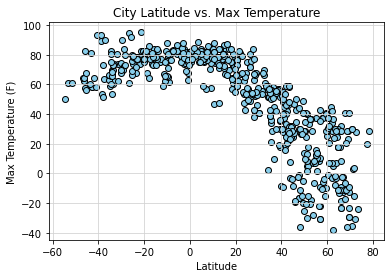

In [5]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()




## Latitude vs. Humidity Plot

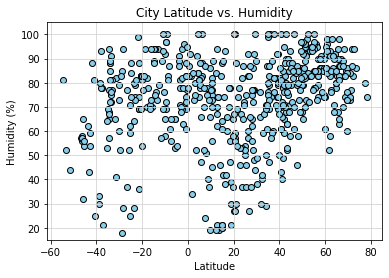

In [6]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

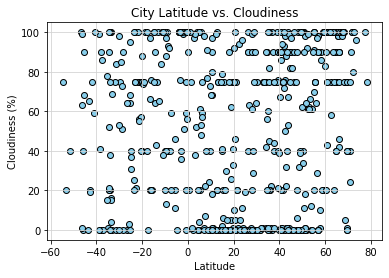

In [7]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

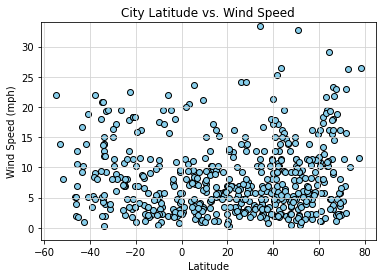

In [8]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [22]:
# Create Linear Regression plots

def plot_lin_reg(x_values, y_values, title, text_coordinates):

    # Run regresson on northern/southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_values.name)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [28]:
northern_hem_df=city_data_df[city_data_df["Lat"] >=0]
northern_hem_df

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
1,1,Paamiut,GL,61.99,-49.67,28.54,91,100,17.34,light snow
2,2,Chara,RU,56.91,118.26,-21.98,74,98,1.45,overcast clouds
3,3,Albany,US,42.60,-73.97,42.01,71,76,5.21,broken clouds
7,7,Suluq,LY,31.67,20.25,55.76,66,0,3.76,clear sky
9,9,Polyarnyy,RU,69.20,33.45,23.00,85,75,2.24,broken clouds
...,...,...,...,...,...,...,...,...,...,...
548,548,Sattahip,TH,12.67,100.90,73.40,94,20,4.70,few clouds
549,549,Puerto Cabello,VE,10.47,-68.01,77.22,80,80,6.55,broken clouds
550,550,Moscow,RU,55.75,37.62,14.00,85,75,11.18,broken clouds
551,551,Partsa,RU,54.37,42.86,8.24,95,0,4.43,clear sky


In [29]:
southern_hem_df=city_data_df[city_data_df["Lat"] <=0]
southern_hem_df

,City_ID,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,0,Busselton,AU,-33.65,115.33,60.01,72,100,1.99,overcast clouds
4,4,Mataura,NZ,-46.19,168.86,63.00,58,63,4.00,broken clouds
5,5,Geraldton,AU,-28.77,114.60,84.20,18,51,17.22,broken clouds
6,6,Arraial Do Cabo,BR,-22.97,-42.03,78.80,74,75,12.75,moderate rain
8,8,Hobart,AU,-42.88,147.33,57.99,54,20,10.29,few clouds
...,...,...,...,...,...,...,...,...,...,...
532,532,Matiri,TZ,-10.75,34.90,65.59,93,100,2.08,light rain
534,534,Alofi,NU,-19.06,-169.92,82.40,83,75,6.93,broken clouds
538,538,Fare,PF,-16.70,-151.02,81.16,69,66,8.55,light rain
545,545,Port-Gentil,GA,-0.72,8.78,80.60,83,20,5.82,moderate rain


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6798570968237052


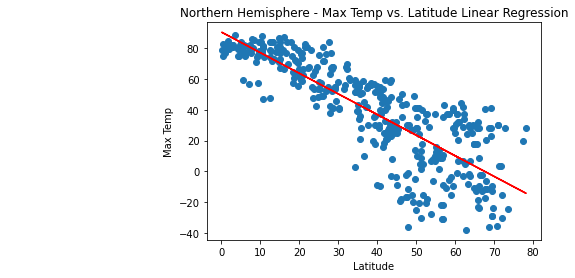

In [30]:
plot_lin_reg(northern_hem_df["Lat"],northern_hem_df["Max Temp"],'Northern Hemisphere - Max Temp vs. Latitude Linear Regression', (-55,90))           

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.18397929308536107


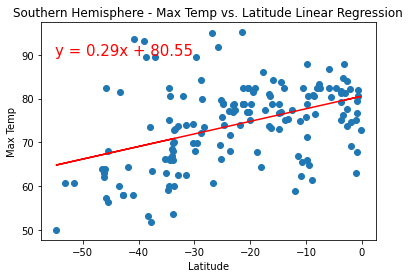

In [31]:
plot_lin_reg(southern_hem_df["Lat"],southern_hem_df["Max Temp"],'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', (-55,90))           

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1503787814164105


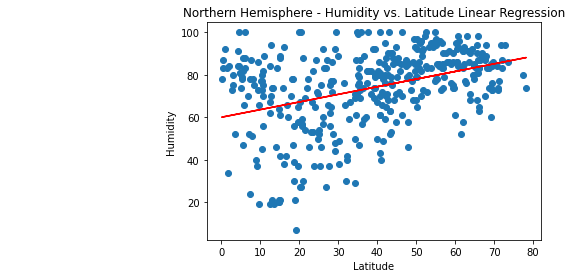

In [32]:
plot_lin_reg(northern_hem_df["Lat"],northern_hem_df["Humidity"],'Northern Hemisphere - Humidity vs. Latitude Linear Regression', (-55,90))           

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12175581055982905


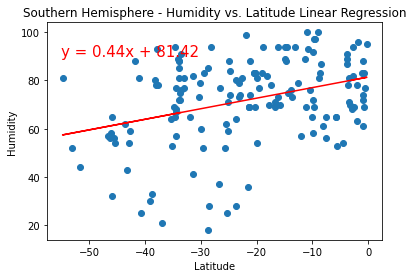

In [33]:
plot_lin_reg(southern_hem_df["Lat"],southern_hem_df["Humidity"],'Southern Hemisphere - Humidity vs. Latitude Linear Regression', (-55,90))           

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08898232267536516


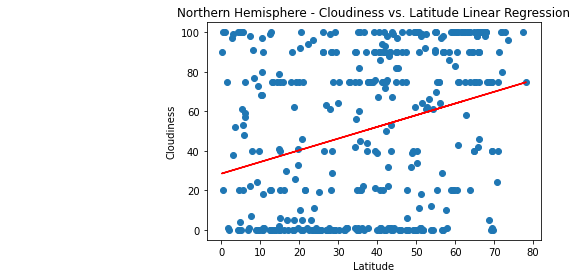

In [34]:
plot_lin_reg(northern_hem_df["Lat"],northern_hem_df["Cloudiness"],'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression', (-55,90)) 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06702568981484514


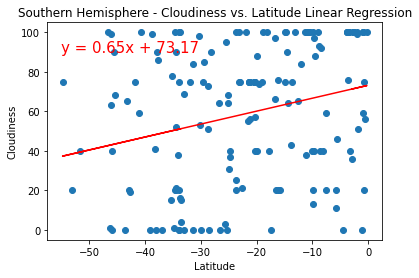

In [35]:
plot_lin_reg(southern_hem_df["Lat"],southern_hem_df["Cloudiness"],'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression', (-55,90)) 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04192882162877606


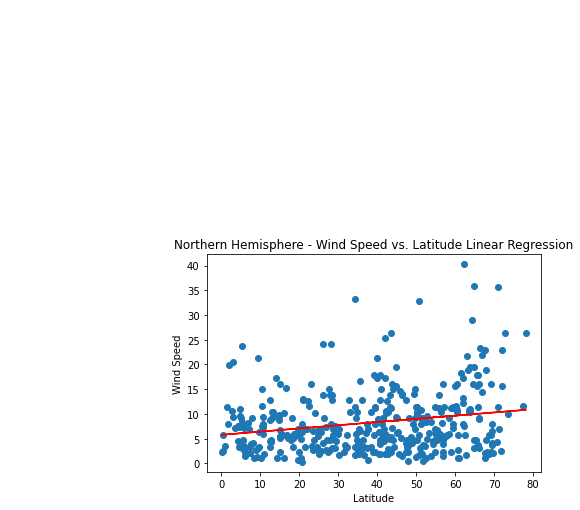

In [36]:
plot_lin_reg(northern_hem_df["Lat"],northern_hem_df["Wind Speed"],'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', (-55,90)) 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05413414384897361


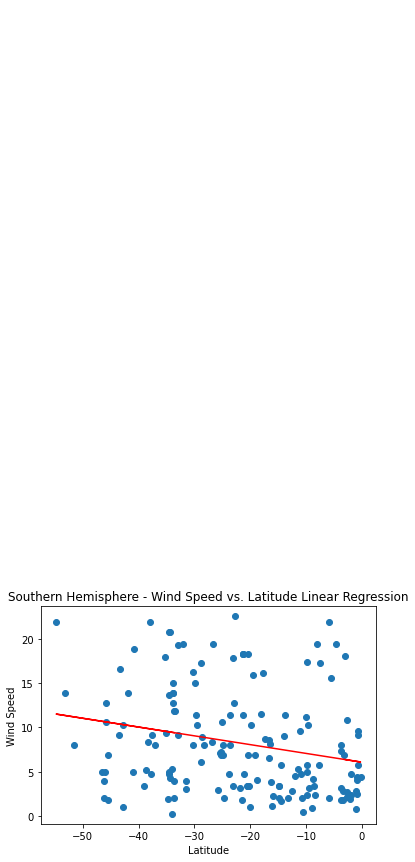

In [38]:
plot_lin_reg(southern_hem_df["Lat"],southern_hem_df["Wind Speed"],'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', (-55,90)) 

In [ ]:
# Observations:
# Temperature correlates with latitude. As latitude moves away from equator, temperature decreases
# It appears there is no correlation between humidity and latitude
# There is also little to no correlation between wind speed and latitude.   
    